In [148]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
def f(x):
    return 3*x**2 - 4*x + 5

In [150]:
f(3.0)

20.0

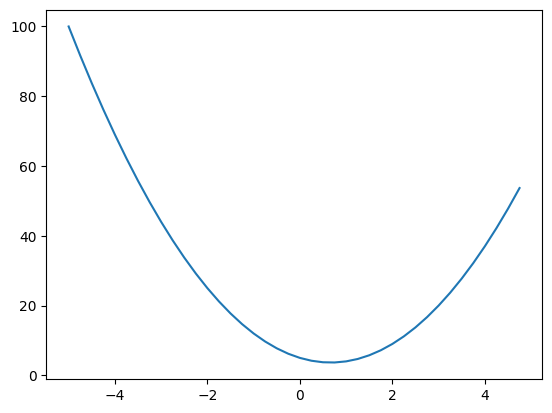

In [151]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [152]:
h = 0.0000000001
x = -3.0
(f(x+h) - f(x)) / h

-21.999966293151374

In [153]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [154]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [191]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # returns a string representation of the object
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

In [156]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label= "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

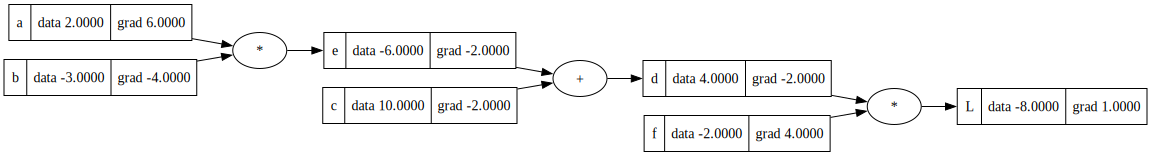

In [169]:
draw_dot(L)

In [187]:
a.data += 0.01*a.grad
b.data += 0.01*b.grad
c.data += 0.01*c.grad
f.data += 0.01*f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

58.05017179753012


In [ ]:
def lol():

    h = 0.001

    a= Value(2.0, label='a')
    b= Value(-3.0, label='b')
    c= Value(10.0, label='c')
    e= a * b; e.label='e'
    d= e + c; d.label='d'
    f= Value(-2.0, label='f')
    L= d * f; L.label='L'
    L1 = L.data

    a = Value(2.0, label='a')
    a.data += h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data

    print((L2 - L1) / h)

lol()


6.000000000000227


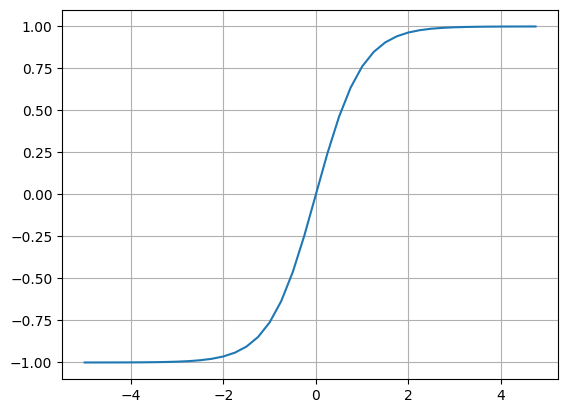

In [188]:
plt.plot(np.arange(-5,5,0.25), np.tanh(np.arange(-5,5,0.25))); plt.grid()

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# neuron output
x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'


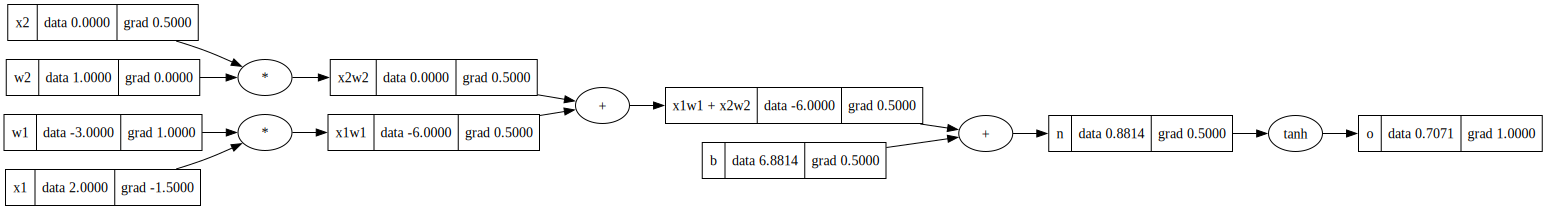

In [213]:
draw_dot(o)

In [212]:
x2.grad = w2.data * x2w2.grad
x1.grad = w1.data * x1w1.grad

w2.grad = x2.data * x2w2.grad
w1.grad = x1.data * x1w1.grad

In [206]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [204]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [ ]:
n.grad = 0.5

In [198]:
o.grad = 1.0

In [201]:
1-o.data**2

0.4999999999999999